In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
# It's highly likely that the intended package is 'mlxtend'
# which contains the 'frequent_patterns' module and the 'apriori' function
!pip install mlxtend

# Now import the module using the correct name
from mlxtend import frequent_patterns
# or you can import a specific function like below
from mlxtend.frequent_patterns import apriori
#If you did intend to install "ace_tools", proceed with the installation.
#!pip install ace_tools
#import ace_tools as tools
import pandas as pd


# Load the dataset to examine its structure
data = pd.read_csv('data.csv')

# Display the first few rows of the dataset to understand its structure and content
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Dataset ini berisi berbagai fitur yang berkaitan dengan spesifikasi mobil. Kolom-kolom utama meliputi:
1. **Make, Model, Year:** Informasi dasar tentang setiap mobil.
2. **Engine Fuel Type, Engine HP, Engine Cylinders:** Rincian mengenai spesifikasi mesin.
3. **Transmission Type, Driven Wheels:** Informasi tentang jenis transmisi dan penggerak.
4. **Number of Doors, Market Category, Vehicle Size, Vehicle Style:** Atribut kendaraan tambahan.
5. **Highway MPG, City MPG, Popularity, MSRP:** Metrik performa dan MSRP mobil.





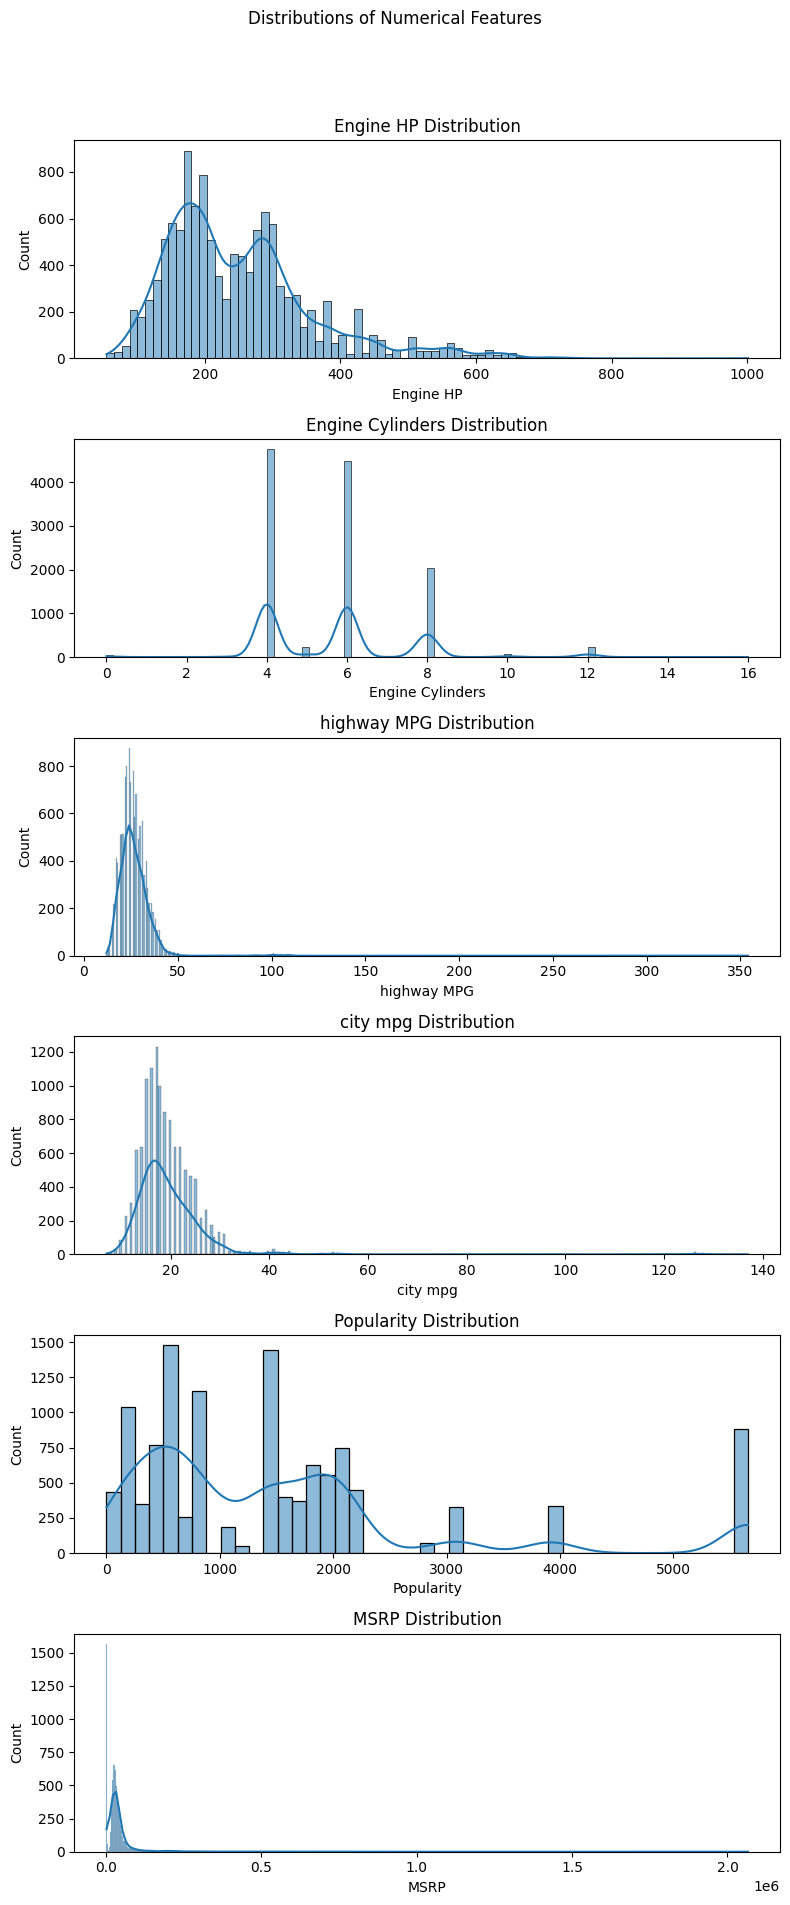

In [3]:
# Basic summary statistics to get an overview of the data distribution
data.describe()

# Plot histograms for numerical features to understand their distributions
numerical_columns = ["Engine HP", "Engine Cylinders", "highway MPG", "city mpg", "Popularity", "MSRP"]

# Setting up plot
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(8, 20))
fig.suptitle("Distributions of Numerical Features")

# Loop through each numerical column and create a histogram
for i, col in enumerate(numerical_columns):
    sns.histplot(data[col].dropna(), ax=axes[i], kde=True)
    axes[i].set_title(f"{col} Distribution")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit titles and space
plt.show()

Histogram mengungkapkan distribusi fitur numerik seperti Engine HP, Engine Cylinders, highway MPG, city mpg, Popularity, dan MSRP. Sebagai contoh, Engine HP dan MSRP tampak miring ke kanan, sementara nilai MPG terdistribusi lebih merata.

In [5]:
# Dropping unnecessary columns that may not contribute directly to regression
data = data.drop(['Make', 'Model', 'Market Category', 'Vehicle Size', 'Vehicle Style'], axis=1)

# Defining features and target variable
X = data.drop('MSRP', axis=1)
y = data['MSRP']

# Preprocessing pipeline
# Separate numerical and categorical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define transformations for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Filling missing numerical values
    ('scaler', StandardScaler())  # Standardizing the data
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Filling missing categorical values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encoding categorical data
])

# Combining transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data is now ready for regression model training
X_train.shape, X_test.shape

((9531, 10), (2383, 10))

Data telah dilakukan preprocessed dan dibagi menjadi set pelatihan dan pengujian, dengan 9.531 sampel untuk pelatihan dan 2.383 sampel untuk pengujian.

In [12]:
# Initialize and train a standard linear regression model
linear_model = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', LinearRegression())])

# Fit the model on training data
linear_model.fit(X_train, y_train)

# Predict on test data
y_pred_linear = linear_model.predict(X_test)

# Evaluate standard linear regression performance
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Initialize and train a linear regression model with polynomial basis functions (degree 2)
poly_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('poly', PolynomialFeatures(degree=2, include_bias=False)),
                             ('regressor', LinearRegression())])

# Fit the model on training data
poly_model.fit(X_train, y_train)

# Predict on test data
y_pred_poly = poly_model.predict(X_test)

# Evaluate polynomial regression performance
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Summarize and compare the results in a dictionary format
comparison_results = {
    'Metric': ['RMSE', 'MSE', 'MAE', 'R-Squared'],
    'Linear Regression': [rmse_linear, mse_linear, mae_linear, r2_linear],
    'Polynomial Regression': [rmse_poly, mse_poly, mae_poly, r2_poly]
}

# Display results in a DataFrame for better visualization
comparison_df = pd.DataFrame(comparison_results)
comparison_df


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Metric,Linear Regression,Polynomial Regression
0,RMSE,2.969335e+04,2.094368e+04
1,MSE,8.816950e+08,4.386378e+08
2,MAE,1.898696e+04,1.269556e+04
3,R-Squared,6.300948e-01,8.159745e-01


Perbandingan model regresi linier standar dan polinomial (derajat 2) menunjukkan metrik evaluasi (RMSE, MSE, MAE, dan R-Squared) untuk masing-masing model. Regresi polinomial memiliki kinerja yang lebih baik di semua metrik, yang mengindikasikan kecocokan yang lebih baik.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


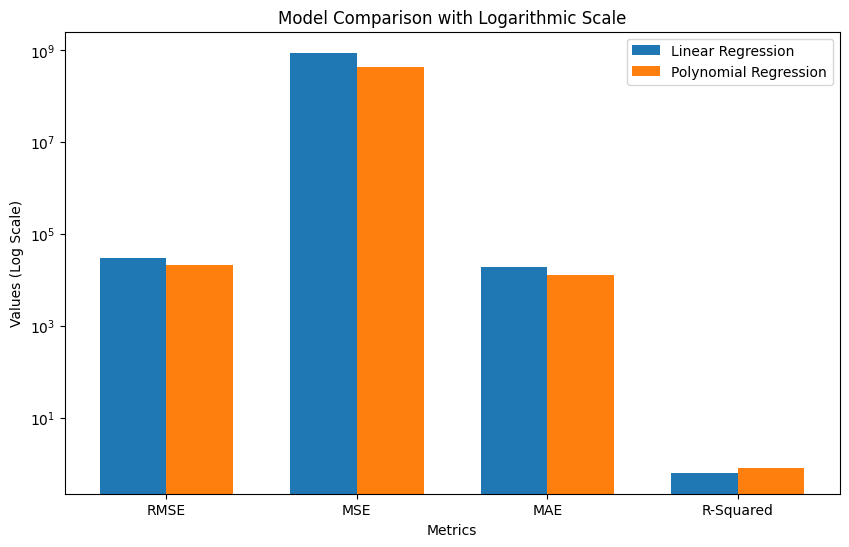

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars with log scale
index = range(len(metrics))
bar_width = 0.35

ax.bar(index, linear_values, bar_width, label='Linear Regression')
ax.bar([i + bar_width for i in index], poly_values, bar_width, label='Polynomial Regression')

# Set log scale
ax.set_yscale('log')
ax.set_xlabel('Metrics')
ax.set_ylabel('Values (Log Scale)')
ax.set_title('Model Comparison with Logarithmic Scale')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(metrics)
ax.legend()

plt.show()
